In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from datetime import datetime
import os
import importlib
from IPython.display import Audio

os.chdir("..")
import context
context.get()

import baseMethods
importlib.reload(baseMethods)

import magSonify
from magSonify import SimulateData

Wavelet stretch in the examples is using the default options (stretch == interpolateAfter) unless otherwise indicated.

## Sine waves

Reproduction of frequency spectra is acceptable at <10000 Hz. The spectra at 15000 Hz is starting to show some clear artifacts with additional frequency peaks forming.

C:\tools\Manim\Lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


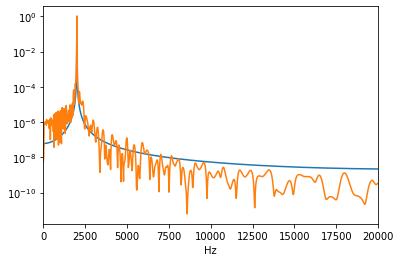

In [2]:
stretch = 16
freq = 2000
expect,after = baseMethods.compare_Sine('waveletStretch',freq,stretch)
def myDisplay(expect,after,xRange=[0,20000],timeGraphXshift = 0,frontEndCut = 0):
    expect = expect[frontEndCut:]
    after = after[frontEndCut:]
    expect.normalise()
    after.normalise()
    baseMethods.plotPSD(expect,after,showPlot=False)
    plt.xlim(xRange)
    return expect, after
expect,after = myDisplay(expect,after)
plt.show()

C:\tools\Manim\Lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


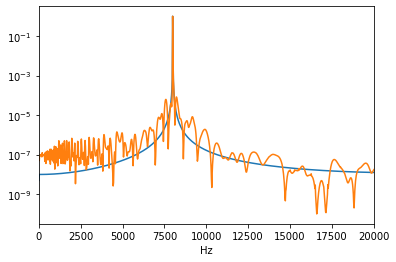

In [3]:
freq = 8000
expect,after = baseMethods.compare_Sine('waveletStretch',freq,stretch)
expect,after = myDisplay(expect,after)
plt.show()

C:\tools\Manim\Lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


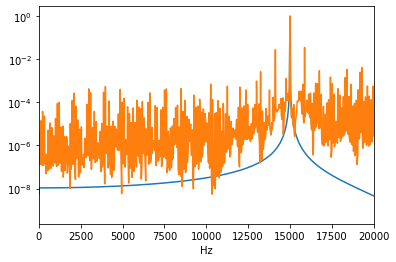

In [20]:
freq = 15000
expect,after = baseMethods.compare_Sine('waveletStretch',freq,stretch)
expect,after = myDisplay(expect,after)
plt.show()

In [21]:
Audio(expect.x,rate=44100)

In [22]:
Audio(after.x,rate=44100)

## Harmonics
Wavelet stretch seems to struggle greatly with reproducing harmonics, note how at 500 Hz seperation, the region between the harmoncis is already populated by peaks in frequncy almost the same amplitude as the two harmonics. By 250 Hz seperation, the two peaks have merged into a single peak.

C:\tools\Manim\Lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


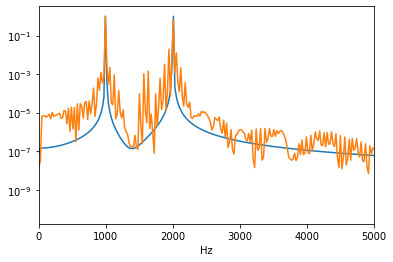

In [5]:
freqs = (1000,2000)
expect,after = baseMethods.compare_Harmonic('waveletStretch',freqs,stretch)
expect,after = myDisplay(expect,after,xRange=[0,5000])
plt.show()

In [6]:
Audio(expect.x,rate=44100)

In [7]:
Audio(after.x,rate=44100)

C:\tools\Manim\Lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


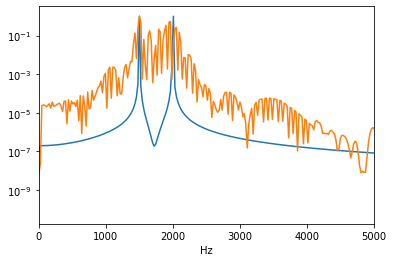

In [8]:
freqs = (1500,2000)
expect,after = baseMethods.compare_Harmonic('waveletStretch',freqs,stretch)
expect,after = myDisplay(expect,after,xRange=[0,5000])
plt.show()

In [9]:
Audio(expect.x,rate=44100)

In [10]:
Audio(after.x,rate=44100)

C:\tools\Manim\Lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


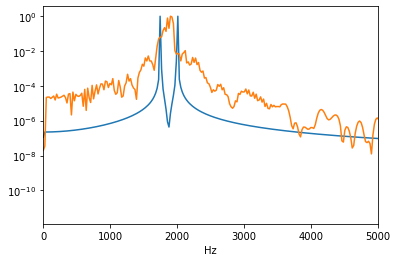

In [11]:
freqs = (1750,2000)
expect,after = baseMethods.compare_Harmonic('waveletStretch',freqs,stretch)
expect,after = myDisplay(expect,after,xRange=[0,5000])
plt.show()

In the audio below, note how in the second file (output of the wavlet stretch) there is a periodic feature, which sounds like series of clicks.

In [12]:
Audio(expect.x,rate=44100)

In [13]:
Audio(after.x,rate=44100)

## Nyquist * n/8

C:\tools\Manim\Lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


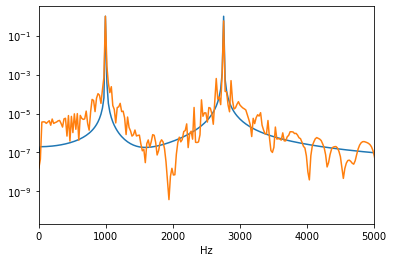

In [14]:
nyquistEighth = 44100/16
# Need to use a pair of frequencis, as looking at a single frequency isn't informative (output is normalised)
freqs = (1000,nyquistEighth)
expect,after = baseMethods.compare_Harmonic('waveletStretch',freqs,stretch)
expect,after = myDisplay(expect,after,xRange=[0,5000])
plt.show()

In [15]:
Audio(expect.x,rate=44100)

In [16]:
Audio(after.x,rate=44100)

C:\tools\Manim\Lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


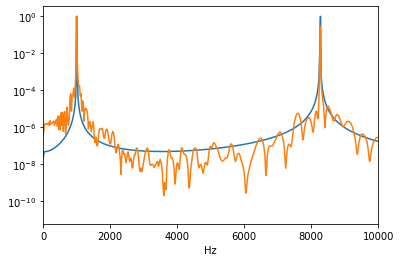

In [17]:
freqs = (1000,nyquistEighth*3)
expect,after = baseMethods.compare_Harmonic('waveletStretch',freqs,stretch)
expect,after = myDisplay(expect,after,xRange=[0,10000])
plt.show()

C:\tools\Manim\Lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


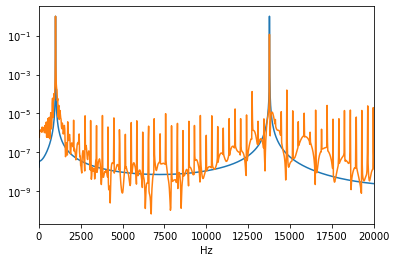

In [18]:
freqs = (1000,nyquistEighth*5)
expect,after = baseMethods.compare_Harmonic('waveletStretch',freqs,stretch)
expect,after = myDisplay(expect,after,xRange=[0,20000])
plt.show()

C:\tools\Manim\Lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


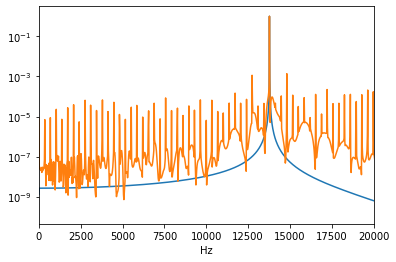

In [19]:
freqs = (nyquistEighth*5,)
expect,after = baseMethods.compare_Harmonic('waveletStretch',freqs,stretch)
expect,after = myDisplay(expect,after,xRange=[0,20000])
plt.show()

## Many harmonics

Note here that when comparing the two audio files, while there is a static / buzzing in the second file, one can still here the original harmonic correctly reproduced. It appears that with real THEMIS data, the time variation of the data suppresses these types of buzzing artifacts, leading to output which matches the frequencies in the original signal with regards to human perception of them.

C:\tools\Manim\Lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


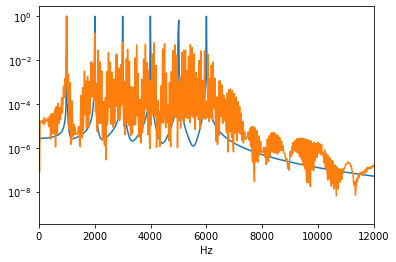

In [28]:
freqs = (1000,2000,3000,4000,5000,6000)
expect,after = baseMethods.compare_Harmonic('waveletStretch',freqs,stretch)
expect,after = myDisplay(expect,after,xRange=[0,12000])
plt.show()

In [29]:
Audio(expect.x,rate=44100)

In [30]:
Audio(after.x,rate=44100)